In [1]:
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import sobel, gaussian_filter, convolve

array([[255, 245, 255,   0,   4],
       [231, 240, 255,   0,  13],
       [255, 255, 239,   8,   0],
       [  0,  11,  14,   0,   4],
       [ 24,  18,   0,   6,   7]], dtype=uint8)

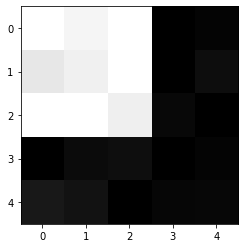

In [2]:
# Load image and convert it to grayscale:
input = imread('corner.jpg')
plt.imshow(input, cmap='gray')
input = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
input

In [3]:
input.shape

(5, 5)

In [4]:
def plotIxIy(Ix, Iy):
    plt.subplot(121)
    plt.title("Ix")
    plt.imshow(Ix, cmap="gray")
    plt.subplot(122)
    plt.title("Iy")
    plt.imshow(Iy, cmap="gray")  

In [ ]:
Ix = sobel(input, axis=0)
Iy = sobel(input, axis=1)
plotIxIy(Ix, Iy)

In [6]:
Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix*Iy
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")
Ixx = convolve(Ixx, GAUSS)
Iyy = convolve(Iyy, GAUSS)
Ixy = convolve(Ixy, GAUSS)
M = [[Ixx , Ixy],[Ixy, Iyy]]

In [7]:
#Set k value -- sensitivity factor
k = 0.04

determinant = Ixx * Iyy - (Ixy ** 2)
trace = Ixx + Iyy

response = determinant - (k * trace ** 2)

print(response)

[[193.52  27.72 218.36  32.36 177.68]
 [ 73.92 222.44  58.88 153.4   52.16]
 [ 93.64 235.68 250.36 220.44  47.52]
 [104.44 216.2    0.92 233.36 143.72]
 [198.56  77.24 106.4  156.24  64.16]]


In [8]:
np.unravel_index(response.argmax(), response.shape)

(2, 2)

In [9]:
response

array([[193.52,  27.72, 218.36,  32.36, 177.68],
       [ 73.92, 222.44,  58.88, 153.4 ,  52.16],
       [ 93.64, 235.68, 250.36, 220.44,  47.52],
       [104.44, 216.2 ,   0.92, 233.36, 143.72],
       [198.56,  77.24, 106.4 , 156.24,  64.16]])

In [10]:
response == 0

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [11]:
coords = np.unravel_index(np.argmax(response, axis=None), response.shape)

In [12]:
coords

(2, 2)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(input, cmap=plt.cm.gray)
ax.plot(coords[0], coords[1], color='red', marker='o',
        linestyle='None', markersize=20)
plt.show()